Temat: Jak kształtuje się nowa rzeczywistość w czasach pandemii.

Przedstawiają: Wiktoria Fimińska, Julia Grzegorzewska, Adam Kawałko, Adam Pędziwiatr

Wstęp: 4 marca 2020 pojawił się w Polsce pierwszy oficjalnie zarażony na Covid-Sars-2. Już tydzień później zostały zamknięte szkoły. Ceny akcji dramatycznie spadały w prawie wszystkich branżach. Pełno firm usługowych musiało całkowicie zamknąć działalność. Polacy zamknęli się w swoich domach i oswajali się z nową rzeczywistością.
Po ponad roku życia w tym globalnym eksperymencie, postanowiliśmy go zbadać. Naszą uwagę skupiliśmy na Polsce.
W tej prezentacji omówimy zmiany jakie zaobserwowaliśmy w kwestiach medycznych oraz jakość powietrza dla stacji przy ul. Korzeniowskiego we Wrocławiu.

In [1]:
#usingi

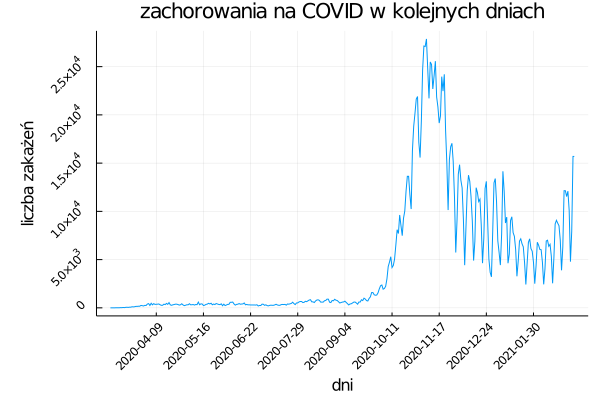

In [2]:
using DelimitedFiles
using Plots
#using DataFrames

zarazenia=readdlm("dane_zarazen_COVID.txt") #wszystkie dni od 04.03.2020 do 03.03.2021
zarazenia_calosc=Float16.(zarazenia[2:end, 3])
plot(zarazenia[2:end, 1], 
    zarazenia_calosc, 
    rotation=45, 
    title="zachorowania na COVID w kolejnych dniach", 
    legend=false, 
    xlabel = "dni", 
    ylabel="liczba zakażeń")

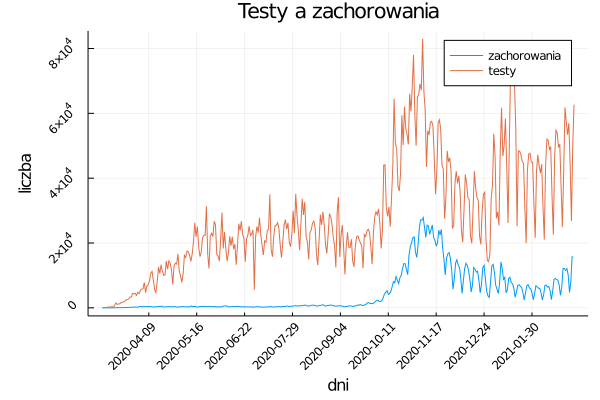

In [4]:
liczba_testow=readdlm("liczba-testów.txt")
plot(zarazenia[2:end, 1], 
    zarazenia_calosc, 
    rotation=45, 
    title="Testy a zachorowania", 
    label="zachorowania", 
    xlabel="dni", 
    ylabel="liczba")
plot!(liczba_testow, label="testy")

In [ ]:
"""function srednia_kroczaca(dane::Array, kolumna::Int64, zakres_sredniej::Int64)
    print(size(dane))
    dane2 = dane 
    for i in 2+zakres_sredniej:size(dane)[1]-zakres_sredniej
        dane2[i, kolumna] = dane[i-zakres_sredniej:i+zakres_sredniej, kolumna]/(zakres_sredniej + 1)
    end
    return dane2
end
zarazeni_lagodne = srednia_kroczaca(zarazenia_w_dni_GPW, 2, 2)"""

In [ ]:
#srednia zachorowania

In [ ]:
#srednia zachorowania testy

In [ ]:
"""using Statistics
cor(zachorowania_calosc, liczba_testow)"""

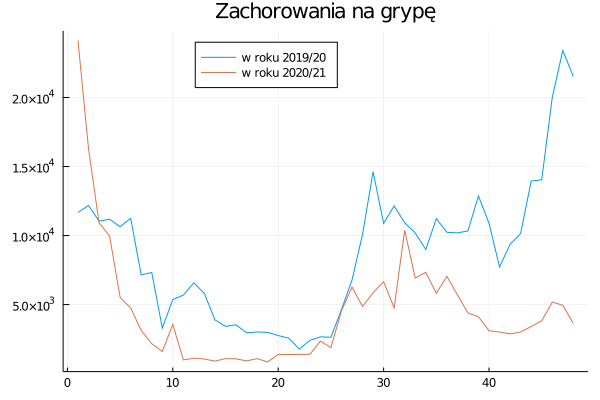

In [16]:
grypa_prze=readdlm("grypa_przed.txt") #daty bez roku
grypa_covi=readdlm("grypa_covid.txt")
grypa_przed=Float16.(grypa_prze[:])
grypa_covid=Float16.(grypa_covi[:])
plot(grypa_przed, label="w roku 2019/20", title="Zachorowania na grypę", legend=:top)
plot!(grypa_covid, label="w roku 2020/21")



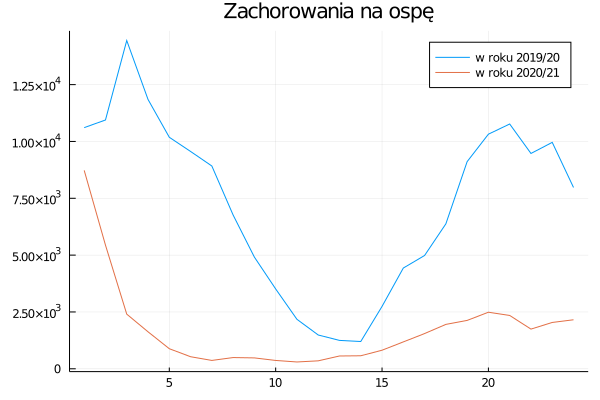

In [21]:
ospa_prze=readdlm("ospa_przed.txt")
ospa_covi=readdlm("ospa_covid.txt")
ospa_przed=Float16.(ospa_prze)
ospa_covid=Float16.(ospa_covi)
plot(ospa_przed, label="w roku 2019/20", title="Zachorowania na ospę")
plot!(ospa_covid, label="w roku 2020/21")

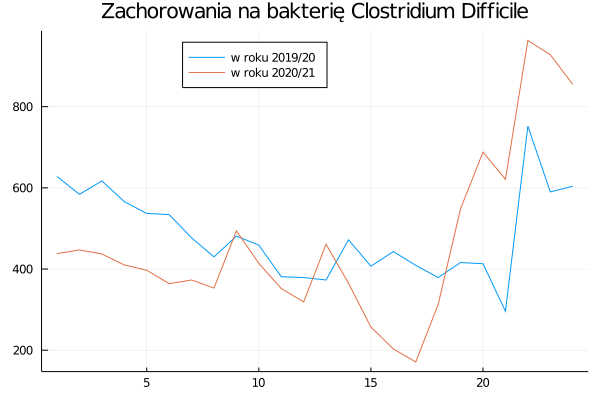

In [24]:
bakteria_prze=readdlm("bakteria_przed.txt")
bakteria_covi=readdlm("bakteria_COVID.txt")
bakteria_przed=Float16.(bakteria_prze)
bakteria_covid=Float16.(bakteria_covi)
plot(bakteria_przed,label="w roku 2019/20", title="Zachorowania na bakterię Clostridium Difficile", legend=:top)
plot!(bakteria_covid, label="w roku 2020/21")

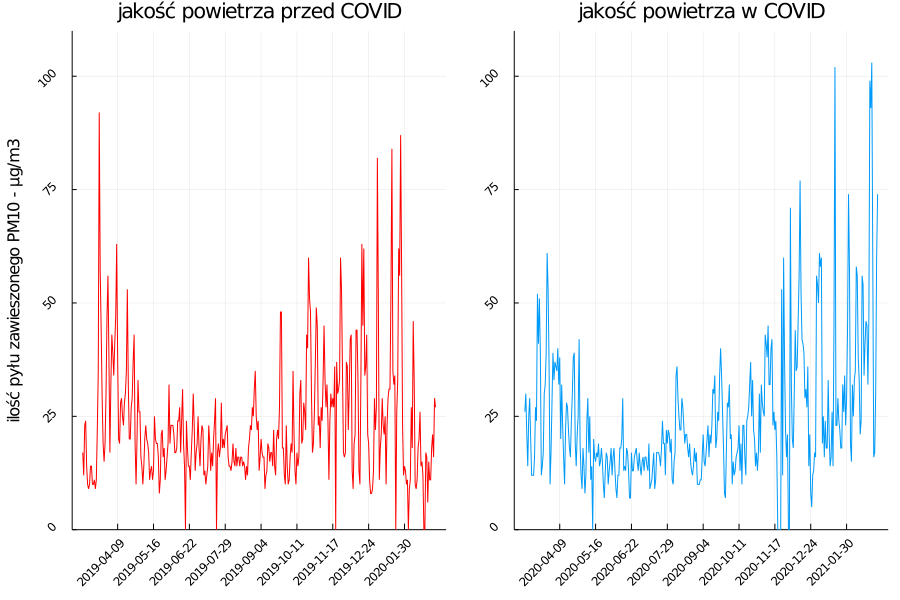

In [137]:
using MosaicViews, TestImages
powietrze_covid=readdlm("powietrze_covid.txt")
powietrze_przed=readdlm("powietrze_przed.txt")
powiet_przed=Float16.(powietrze_przed[2:end, 2])
powiet_covid=Float16.(powietrze_covid[2:end, 2])
przed_cov=plot(powietrze_przed[2:end,1], powiet_przed, rotation=45 ,legend=false, title="jakość powietrza przed COVID", color = "red", ylabel="ilość pyłu zawieszonego PM10 - µg/m3")
w_cov=plot(zarazenia[2:end, 1], powiet_covid, rotation=45, legend=false, title="jakość powietrza w COVID", ylims = (0,100))
plot(przed_cov,w_cov,size = (900, 600), legend = false, ylims = (0,110))

Docelowo chcemy mieć dni działania GPW, by móc lepiej analizować później sytuację na giełdzie.

In [8]:
function zarazenia_GPW(wszystkie_dni::Array{}) #funkcja tworzy tablice z dni w które działa giełda papierów wartościowych
    CCC=readdlm("CCC_COVID.txt")
    dni_GPW = Array{Any,2}(undef, 252,3)
    dni_GPW[1,1:3] .= wszystkie_dni[1, 1:3]
    for i in 2:252
        j = 0
        while CCC[i,1] != wszystkie_dni[i+j,1]
            j += 1
        end
        dni_GPW[i,1:3] .= wszystkie_dni[i+j, 1:3]
    end
    return dni_GPW
end
zarazenia_w_dni_GPW = zarazenia_GPW(zarazenia)

252×3 Array{Any,2}:
 "Data"               "Narastaj\xb9co"       "\xa3\xb9cznydziennyprzyrost"
 "2020-03-04"        1                      1
 "2020-03-05"        1                      0
 "2020-03-06"        5                      4
 "2020-03-09"       17                      6
 "2020-03-10"       22                      5
 "2020-03-11"       31                      9
 "2020-03-12"       51                     20
 "2020-03-13"       68                     17
 "2020-03-16"      177                     52
 "2020-03-17"      238                     61
 "2020-03-18"      287                     49
 "2020-03-19"      355                     68
 ⋮                                      
 "2021-02-16"  1605372                   8694
 "2021-02-17"  1614446                   9073
 "2021-02-18"  1623218                   8777
 "2021-02-19"  1631727                   8510
 "2021-02-22"  1648962                   6310
 "2021-02-23"  1661109                  12146
 "2021-02-24"  1673252              

In [ ]:
function test()
    a::Int64 = 7
    b::Int8 = 2
    a+b
end
test()